1. PreProcessing
### 2. Modeling
3. Evaluate

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

_raw_ = load_boston()

data = _raw_['data']
target = _raw_['target']
df=pd.DataFrame(np.concatenate([data,target.reshape(-1,1)],axis=1),
                columns=list(_raw_['feature_names'])+['target'])

/opt/homebrew/Caskroom/miniforge/base/envs/_main_/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

In [43]:
# 1. data_target_split
data = df.drop(['target'],axis=1)
target = df['target']

# 2. scaling
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
data_ssc=ssc.fit_transform(data)

# 3. train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    data,target,
    test_size=0.2,
    random_state=42
)

# 4. Kfold Cross_Validate to select Main Model
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso

for model in [LinearRegression(), Ridge(), Lasso()]:
    _cv=cross_validate(model,
                       x_train,y_train,
                       cv=kfold,
                       )
    print(f"{str(model)[:-2]} :\n    - mean {round(_cv['test_score'].mean(),4)}\n    - std {round(_cv['test_score'].std(),4)}")

# 5. gridsearch_with main_model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = {
    'alpha':[0.5,1.0,1.5],
    'tol': [0.0001,0.001,0.01]
}

grid_cv_main = GridSearchCV(
    Ridge(),
    param_grid=params,
    cv=kfold
)

grid_cv_main.fit(x_train,y_train)

best_grid_cv_model = grid_cv_main.best_estimator_
y_pred=best_grid_cv_model.predict(x_test)

LinearRegression :
    - mean 0.7185
    - std 0.0784
Ridge :
    - mean 0.7173
    - std 0.0825
Lasso :
    - mean 0.671
    - std 0.073


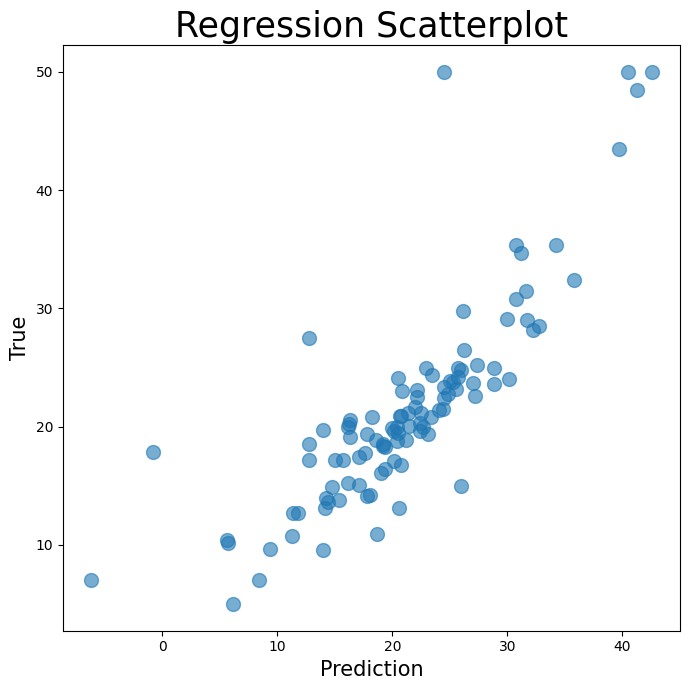

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_test,
            s=100,
            alpha=0.6)
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('True',fontsize=15)
plt.title('Regression Scatterplot',fontsize=25)
plt.tight_layout()
plt.show()